## Лабораторная 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [6]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [7]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [8]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

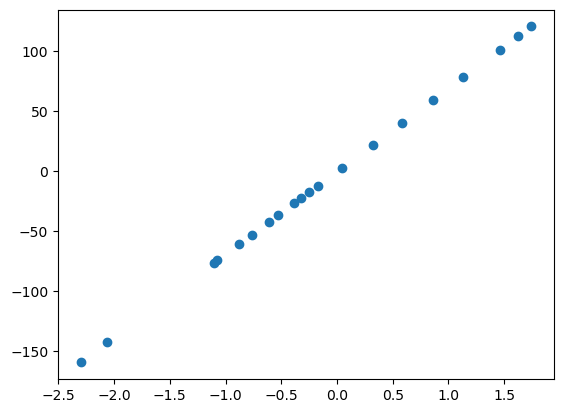

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [10]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [11]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


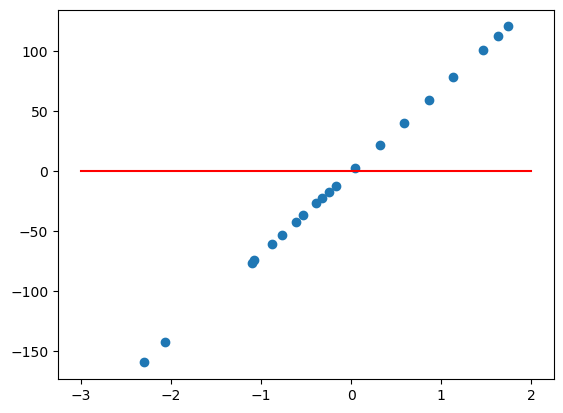

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [13]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.745680891855


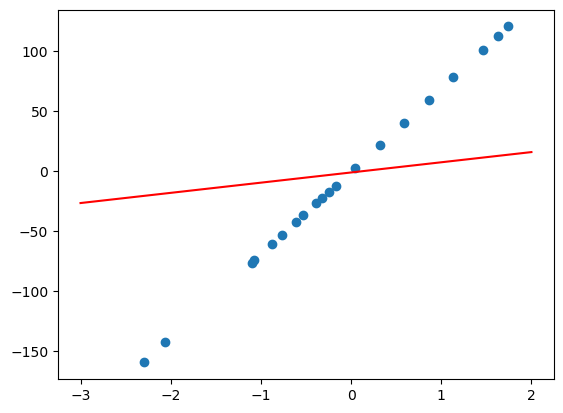

In [14]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

error after gradient descent: 2.7769753060572152e-06


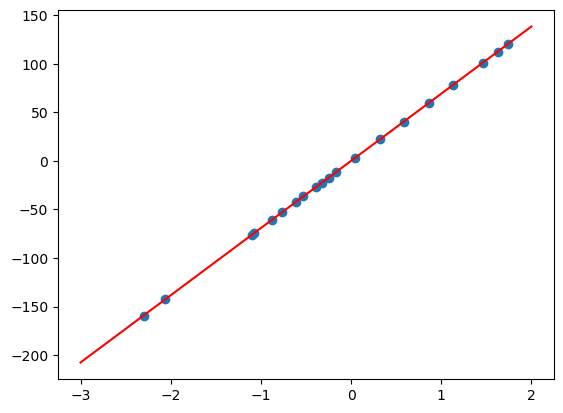

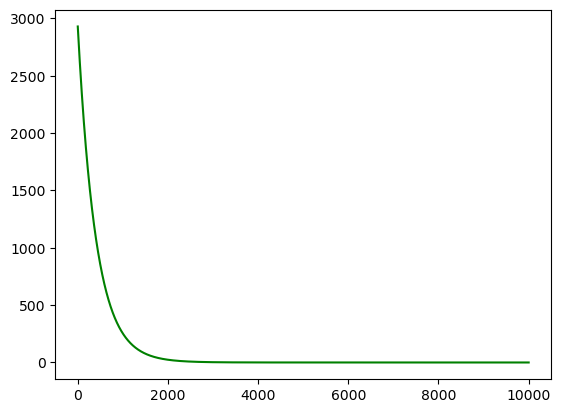

In [16]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

### Задания для самостоятельного выполнения
* Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.
* Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
* Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
* Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
* Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.
* Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
* Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Конвергенция достигнута на шаге 546


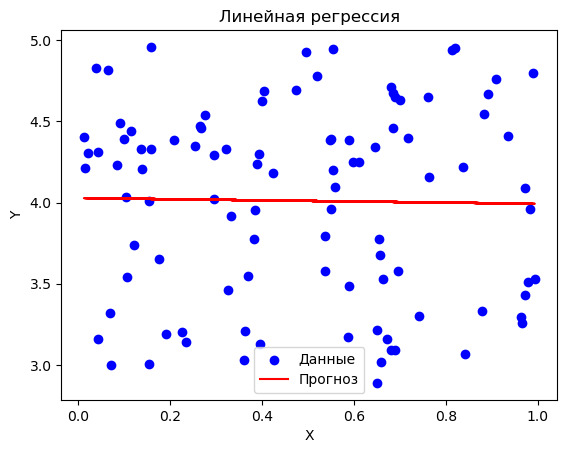

In [19]:

class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return np.sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.000001, max_steps=5000):
        # Приведение данных к Series или DataFrame
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]  # Берем только первый столбец
        if isinstance(Y, pd.DataFrame):
            Y = Y.iloc[:, 0]  # Берем только первый столбец

        steps, errors = [], []
        step = 0
        previous_error = float('inf')

        # Адаптивная скорость обучения
        while step < max_steps:
            dJ0 = np.sum(self.predict(X) - Y) / len(X)
            dJ1 = np.sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1

            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)

            # Снижение ошибки на каждом шаге
            if abs(previous_error - new_err) < accuracy:
                print(f"Конвергенция достигнута на шаге {step}")
                break

            # Адаптация скорости обучения
            if new_err > previous_error:
                alpha /= 2  # Уменьшаем скорость обучения в 2 раза
                print(f"Скорость обучения уменьшена до {alpha}")
                # Перезапускаем градиентный спуск с новой скоростью
                self.b0, self.b1 = 0, 0  # Перезапуск
                step = 0  # Сбрасываем шаги

            previous_error = new_err

        return steps, errors

    def plot(self, X, Y):
        """Метод для рисования графика (независимо от масштаба данных)"""
        plt.scatter(X, Y, color='blue', label='Данные')
        plt.plot(X, self.predict(X), color='red', label='Прогноз')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Линейная регрессия')
        plt.legend()
        plt.show()

# Пример использования:
# Создание данных
data = pd.DataFrame({'X': np.random.rand(100), 'Y': 3 + 2 * np.random.rand(100) + np.random.randn(100) * 0.1})

# Инициализация и обучение модели
model = Model()
steps, errors = model.fit(data['X'], data['Y'], alpha=0.1)

# Рисуем график
model.plot(data['X'], data['Y'])
